In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from src.hiveconnect import hiveapp

In [2]:
# data = hiveapp.ExtractRows('select * from fact_segment','buidu')

c:\Education\Uni\BigData\Final_Project\Data-Mining-with-ApacheHive\src\hiveconnect\hiveapp.py:182: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sqlstr, connection)



 converting the rows_data into python list of tuples 

converted suscessfully the rows_data into python list of tuples


In [ ]:
# data

In [4]:
df = pd.DataFrame(columns=['customer_id','city','country','active','full_name','rental_id','amount',
                           'rental_date','first_date','recency','monetary','frequency'])

for tup in tqdm(data):
    df.loc[len(df)] = list(tup)

100%|██████████| 16044/16044 [00:40<00:00, 395.66it/s]


In [5]:
fact_segment = df.copy()
fact_segment.head()

,customer_id,city,country,active,full_name,rental_id,amount,rental_date,first_date,recency,monetary,frequency
0,448,Erlangen,Germany,1,MIGUEL BETANCOURT,13250,3.99,2005-08-19,2005-05-26,264,135.70999,29
1,448,Erlangen,Germany,1,MIGUEL BETANCOURT,15358,9.99,2005-08-22,2005-05-26,264,135.70999,29
2,448,Erlangen,Germany,1,MIGUEL BETANCOURT,3992,6.99,2005-07-06,2005-05-26,264,135.70999,29
3,448,Erlangen,Germany,1,MIGUEL BETANCOURT,14711,2.99,2005-08-21,2005-05-26,264,135.70999,29
4,448,Erlangen,Germany,1,MIGUEL BETANCOURT,3347,5.99,2005-06-21,2005-05-26,264,135.70999,29


In [4]:
# fact_segment.to_csv('./data/tables/factSegment.csv', index=False)

fact_segment = pd.read_csv('./data/tables/factSegment.csv')
fact_segment.head()

,customer_id,city,country,active,full_name,rental_id,amount,rental_date,first_date,recency,monetary,frequency
0,448,Erlangen,Germany,1,MIGUEL BETANCOURT,13250,3.99,2005-08-19,2005-05-26,264,135.70999,29
1,448,Erlangen,Germany,1,MIGUEL BETANCOURT,15358,9.99,2005-08-22,2005-05-26,264,135.70999,29
2,448,Erlangen,Germany,1,MIGUEL BETANCOURT,3992,6.99,2005-07-06,2005-05-26,264,135.70999,29
3,448,Erlangen,Germany,1,MIGUEL BETANCOURT,14711,2.99,2005-08-21,2005-05-26,264,135.70999,29
4,448,Erlangen,Germany,1,MIGUEL BETANCOURT,3347,5.99,2005-06-21,2005-05-26,264,135.70999,29


## **Khám phá dữ liệu được tổng hợp**

In [5]:
fact_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  16044 non-null  int64  
 1   city         16044 non-null  object 
 2   country      16044 non-null  object 
 3   active       16044 non-null  int64  
 4   full_name    16044 non-null  object 
 5   rental_id    16044 non-null  int64  
 6   amount       16044 non-null  float64
 7   rental_date  16044 non-null  object 
 8   first_date   16044 non-null  object 
 9   recency      16044 non-null  int64  
 10  monetary     16044 non-null  float64
 11  frequency    16044 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ MB


In [6]:
fact_segment.duplicated().sum()

0

In [7]:
fact_segment.isna().sum()

customer_id    0
city           0
country        0
active         0
full_name      0
rental_id      0
amount         0
rental_date    0
first_date     0
recency        0
monetary       0
frequency      0
dtype: int64

In [8]:
fact_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  16044 non-null  int64  
 1   city         16044 non-null  object 
 2   country      16044 non-null  object 
 3   active       16044 non-null  int64  
 4   full_name    16044 non-null  object 
 5   rental_id    16044 non-null  int64  
 6   amount       16044 non-null  float64
 7   rental_date  16044 non-null  object 
 8   first_date   16044 non-null  object 
 9   recency      16044 non-null  int64  
 10  monetary     16044 non-null  float64
 11  frequency    16044 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ MB


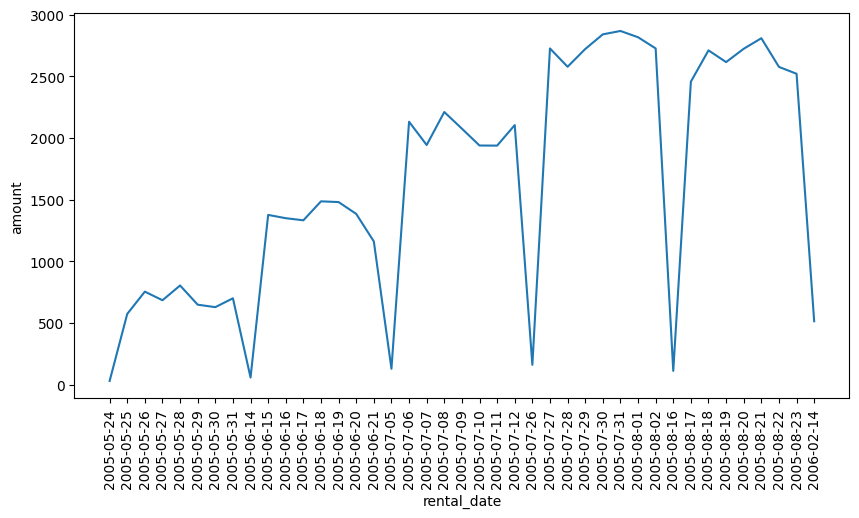

In [9]:
revenue_date = fact_segment.groupby('rental_date')['amount'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=revenue_date['rental_date'], y=revenue_date['amount'])
plt.xticks(rotation=90)
plt.show()

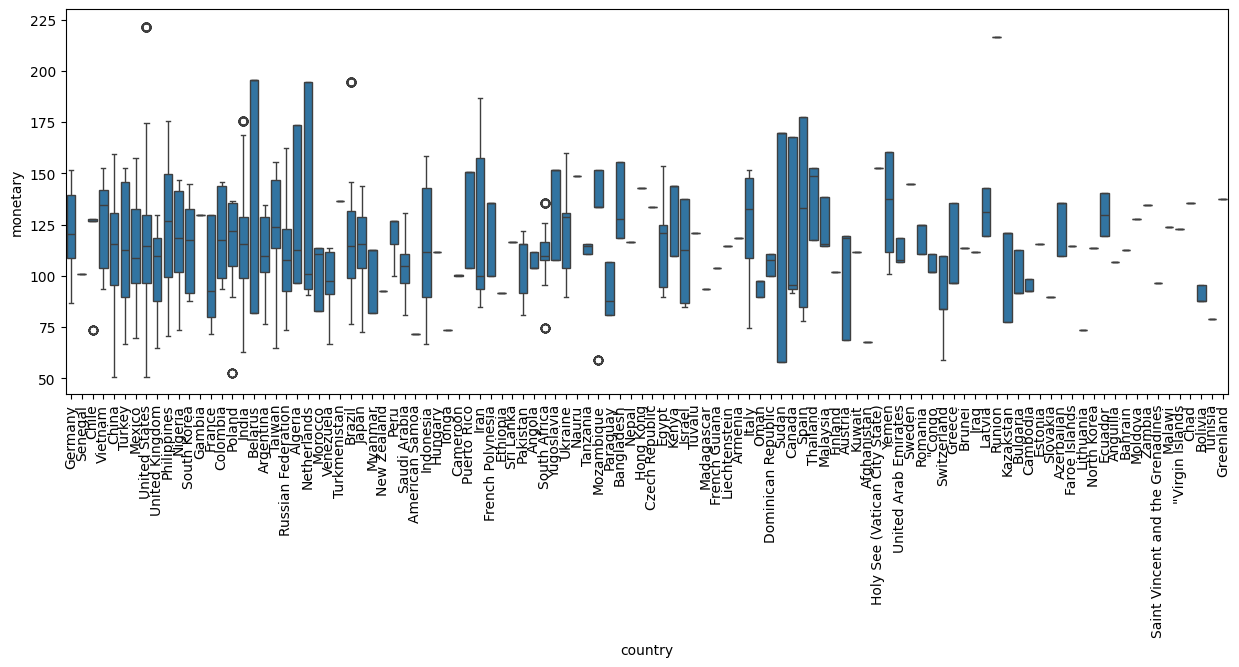

In [10]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=fact_segment, y='monetary', x='country', legend=False)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='frequency', ylabel='recency'>

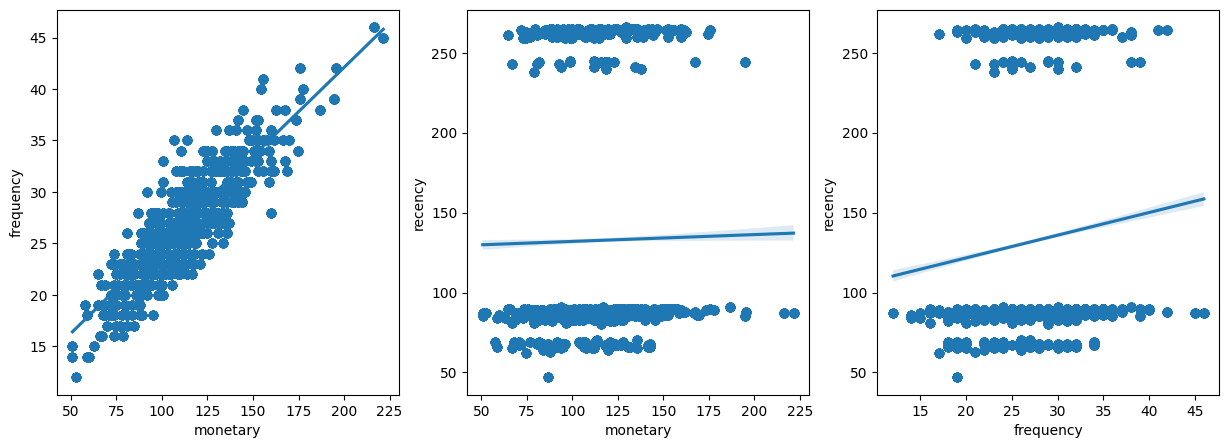

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.regplot(data=fact_segment, x='monetary', y='frequency', ax=ax[0])
sns.regplot(data=fact_segment, x='monetary', y='recency', ax=ax[1])
sns.regplot(data=fact_segment, x='frequency', y='recency', ax=ax[2])

## **Phân cụm khách hàng**

In [12]:
final_segment = fact_segment[['recency','monetary','frequency']]
final_segment = final_segment.drop_duplicates().reset_index().drop(columns=['index'])

scaler = MinMaxScaler().set_output(transform="pandas")
segment_scale = scaler.fit_transform(final_segment)
segment_scale

,recency,monetary,frequency
0,0.990868,0.497129,0.500000
1,0.196347,0.292326,0.382353
2,0.191781,0.134681,0.117647
3,0.995434,0.532220,0.529412
4,0.981735,0.291857,0.617647
...,...,...,...
573,0.191781,0.461922,0.529412
574,0.986301,0.654774,0.764706
575,0.164384,0.198770,0.294118
576,0.182648,0.251435,0.323529


* Tìm số cụm tối ưu cho mô hình Kmeans

In [13]:
from clusteval import clusteval

*1. Phương pháp ước lượng tỉ lệ từ điểm trong cụm chính nó cho đến các điểm khác*

In [30]:
# Set parameters, as an example dbscan
ce = clusteval(evaluate='silhouette', max_clust=11)

# Fit to find optimal number of clusters using dbscan
results = ce.fit(segment_scale)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO:   0%|          | 0/9 [00:00<?, ?it/s]

[clusteval] >INFO: 100%|██████████| 9/9 [00:00<00:00, 74.39it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


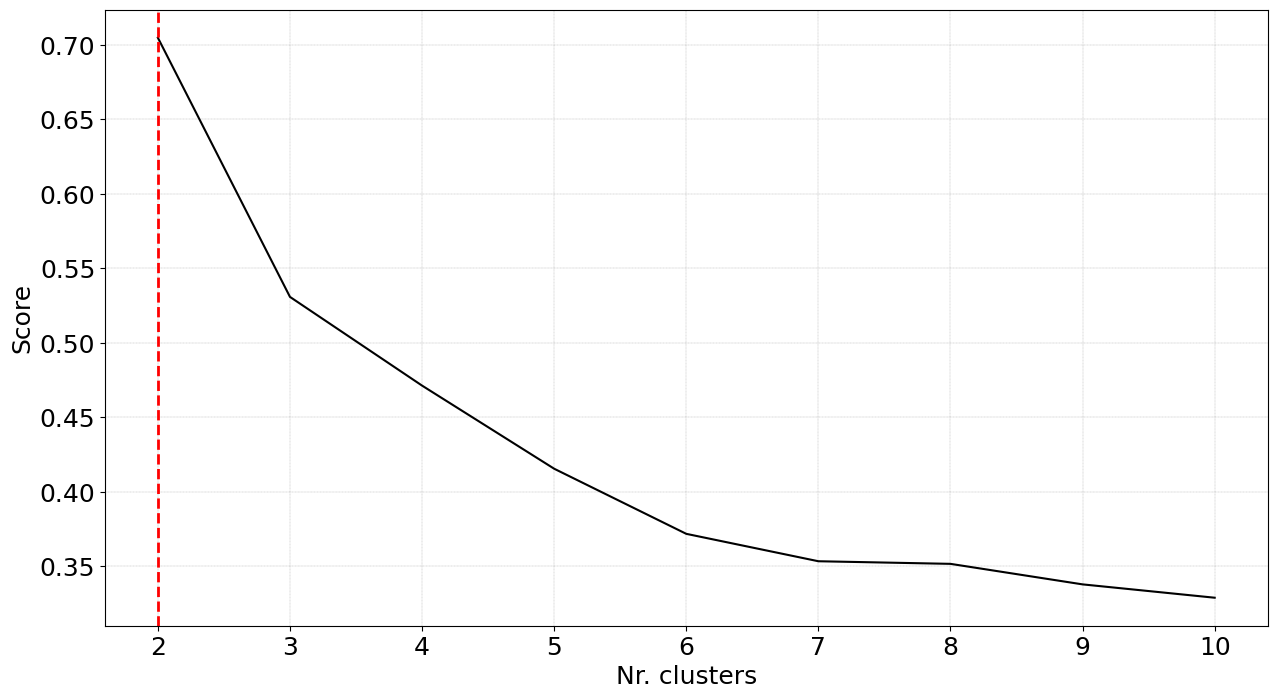

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [31]:
ce.plot(verbose=0)

*2. Phương pháp tính trung bình khoãng cách của 1 điểm đến cụm chính nó*

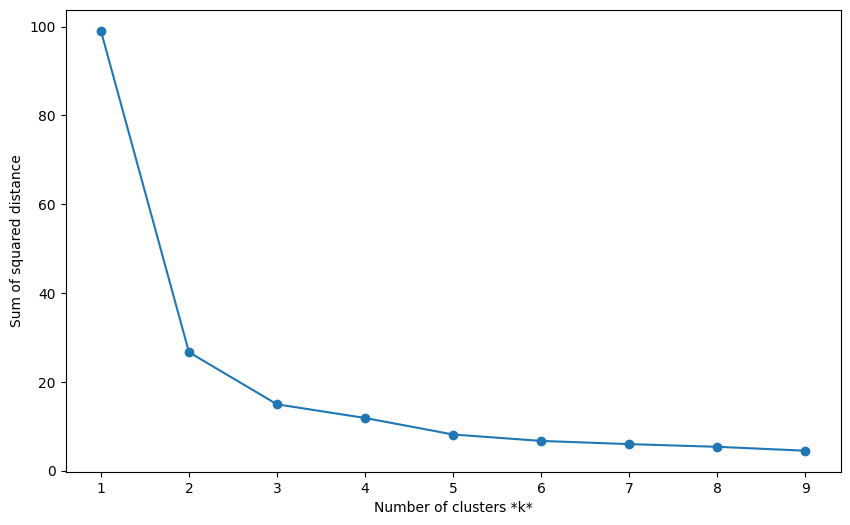

In [16]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(segment_scale)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(10, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

* Thực hiện phân cụm theo k cụm thích hợp, chọn k = 4 vì tại đây độ đo có dấu hiệu giảm đáng kể tạo thành hình khủy tay (elbow)

In [17]:
kmeans = KMeans(n_clusters=4, verbose=0).fit(segment_scale)
segmentation = kmeans.predict(segment_scale)

In [18]:
kmeans.cluster_centers_

array([[0.17853881, 0.54168772, 0.6157754 ],
       [0.97428503, 0.36601302, 0.46130031],
       [0.1647403 , 0.19702009, 0.25344669],
       [0.1714029 , 0.36284075, 0.43022528]])

In [19]:
final_segment['cluster'] = segmentation
final_segment.head()

,recency,monetary,frequency,cluster
0,264,135.70999,29,1
1,90,100.75000,25,3
2,89,73.84000,16,2
3,265,141.70000,30,1
4,262,100.67000,33,1


[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


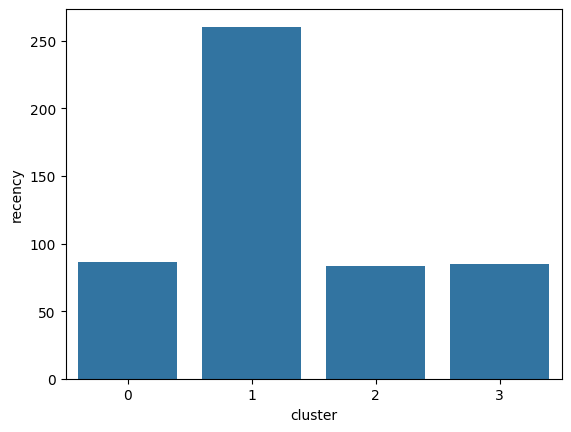

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


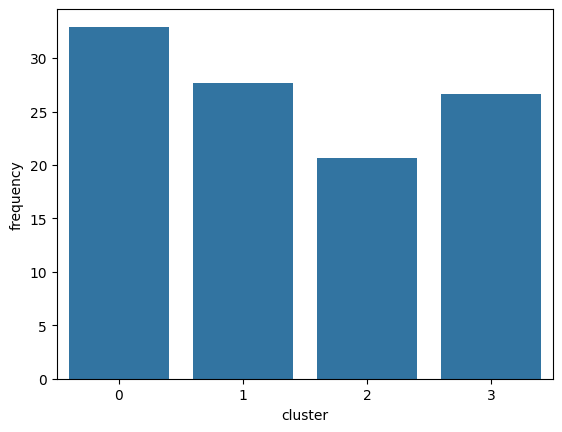

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


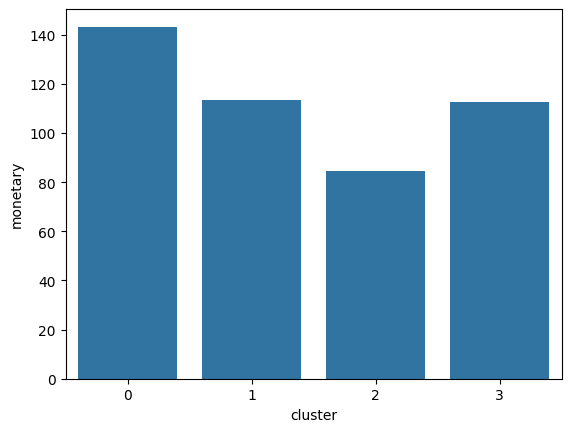

In [20]:
customer_clusters = final_segment.groupby(['cluster'], as_index=False).mean()

cols = ['recency','frequency','monetary']

for i in cols:
    sns.barplot(data=customer_clusters, x='cluster', y=i)
    plt.show()

In [20]:
from sklearn.decomposition import PCA
import numpy as np

In [66]:
def cluster_scatterplot(data, centers):
    twodim = PCA().fit_transform(data)[:,:2]
    plt.figure(figsize=(7,7))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='#5DADE2')
    
    twodim = PCA().fit_transform(centers)[:,:2]
    for i,j in twodim:
        plt.scatter(i, j, s=100, c='r', marker='+')

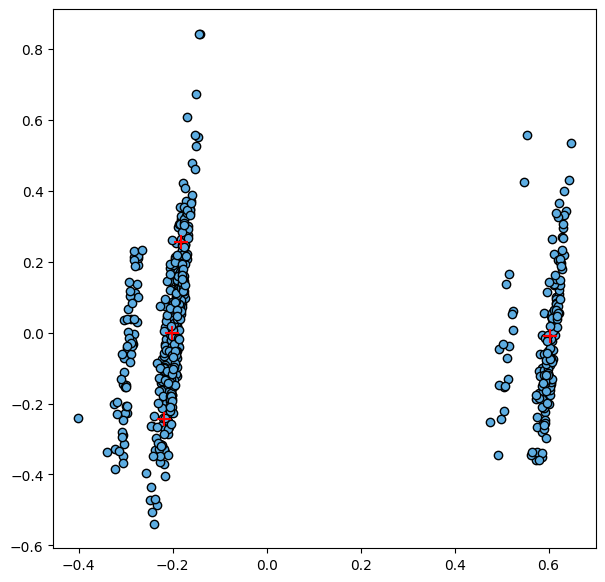

In [67]:
cluster_scatterplot(segment_scale, kmeans.cluster_centers_)

Chia thành 4 nhóm khách hàng:

`Recency thấp - Frequency trung bình - Monetary trung bình:` 
+ Là nhóm khách hàng từng rất tiềm năng nhưng dạo gần đây đã mất hứng thú với doanh nghiệp
+ Cần các chiến dịch marketing để thu hút họ trở lại

`Recency cao - Frequency trung bình - Monetary trung bình:` 
+ Là nhóm khách hàng tiềm năng để chuyển đổi thành khách hàng trung thành
+ Doanh nghiệp cần triển khai các chiến lược marketing phù hợp để thu hút và giữ chân nhóm khách hàng này

`Recency thấp - Frequency cao - Monetary cao:`
+ Là nhóm khách hàng tiềm năng có giá trị cao cho doanh nghiệp trong quá khứ
+ Việc triển khai các chiến lược marketing phù hợp sẽ giúp thu hút họ trở lại và gia tăng doanh thu từ nhóm khách hàng này

`Recency thấp - Frequency thấp - Monetary thấp:` 
+ Là nhóm khách hàng có giá trị thấp cho doanh nghiệp
+ Doanh nghiệp cần cân nhắc việc đầu tư thời gian và nguồn lực vào nhóm khách hàng này